---
title: "Oh! Segmentation Tasks, Segmentation Tasks"
author: "Abdullah Zeeshan"
date: "2022/12/05"
date-modified: "2023/05/28"
categories: [computer vision]
toc: true
description: Can computers detect objects in an image?
fig-align: center
fig-cap-location: bottom
sidebar: false
---


## Introduction

![Street view image created using Stable Diffusion](street.jpg)

Can you recognize various objects from the above picture? Our eyes have the ability to see a complete image and recognize the distinguishing objects from it. We know there is a car on the left, a person ahead on the right, etc. Can we make computers do this?! Let us find out!

## What Is Segmentation?

Segmentation refers to the process of dividing an image into multiple regions or segments, where each segment corresponds to a specific object or background. 

The goal of a segmentation model in Deep Learning is to recognize the content of every individual pixel in an image thereby localizing objects in it.

This task is very important for self-driving cars, for example. If a self-driving car doesn’t know where a pedestrian is, then it doesn’t know how to avoid one!

## Building A Segmentation Model

We will train a simple segmentation model using the `fastai` library.

![Source: <https://giphy.com/gifs/starwars-star-wars-the-last-jedi-xT9Iguc1FSPtLmCw5W>](train.gif)

### Installing & Importing Relevant Libraries

We will install the `fastai` software and export all the *vision* libraries, since this is computer vision task.

In [ ]:
!pip install -Uqqq fastai

In [ ]:
from fastai.vision.all import *

### Getting Training Data

We will use a subset of the [CamVid](http://mi.eng.cam.ac.uk/research/projects/VideoRec/CamVid/) dataset from the paper [“Semantic Object Classes in Video: A High-Definition Ground Truth Database”](http://www0.cs.ucl.ac.uk/staff/G.Brostow/papers/Brostow_2009-PRL.pdf) by Gabriel J. Brostow et al.

The following code gets the data for us!

In [ ]:
path = untar_data(URLs.CAMVID_TINY)
path

Path('/root/.fastai/data/camvid_tiny')

Now that we got the data, before using it for training our model, we we will have to specify `fastai` what kind of data we have, how it is structured, and for what task are we going to use it. 

The following code does this.

In [ ]:
dls = SegmentationDataLoaders.from_label_func(path, bs = 8, fnames = get_image_files(path/'images'),
                                             label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
                                             codes = np.loadtxt(path/'codes.txt', dtype = str))

Let us have a look at our data!

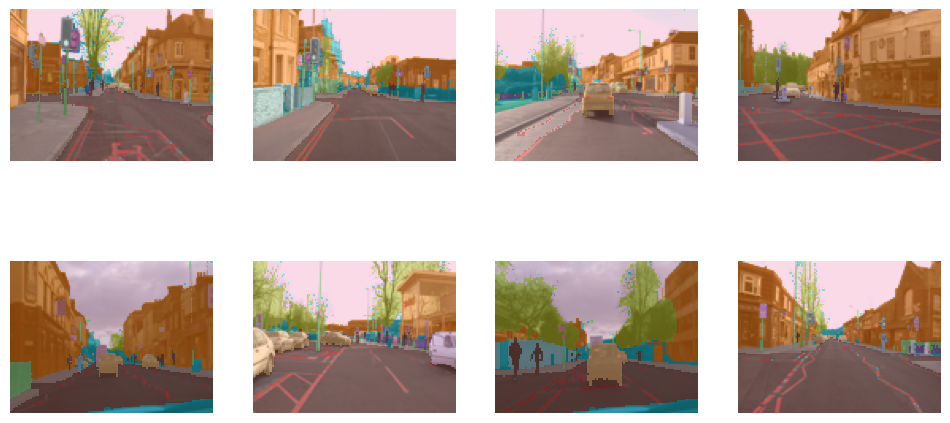

In [ ]:
dls.show_batch()

These are the 8 images for which we will train a model that can recognize its objects.

### Using A Learner & Fine-tuning

We will use a `unet` learner and `resenet34` architecture, a pre-trained model to fine-tune it for our task of segmentation.

In [ ]:
learner = unet_learner(dls, resnet34)
learner.fine_tune(10)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 298MB/s]


epoch,train_loss,valid_loss,time
0,2.925367,1.908659,00:11


epoch,train_loss,valid_loss,time
0,1.629299,1.505528,00:01
1,1.446579,1.181775,00:01
2,1.380383,1.429530,00:01
3,1.333090,1.063483,00:01
4,1.237765,1.000342,00:01
5,1.134848,0.884875,00:01
6,1.037858,0.903598,00:01
7,0.948801,0.812336,00:01
8,0.874415,0.829520,00:01
9,0.816568,0.826488,00:01


The training is done! It trained for about 15-20 sec. 

Let us see the results!

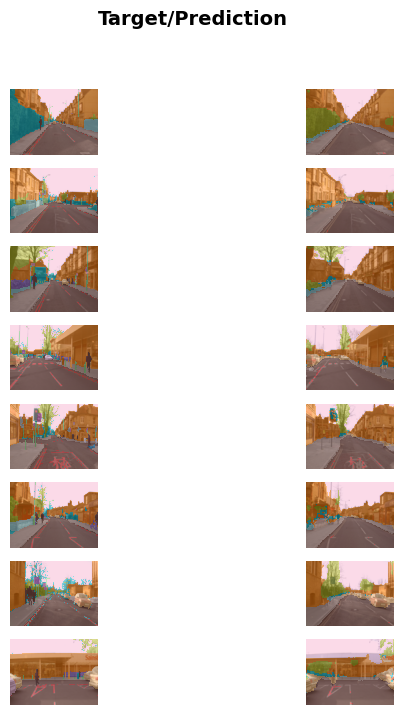

In [ ]:
learner.show_results(figsize = (7, 8))

Voila! On the left are the original images, and on the right are the ones that were segmented by our model. We can clearly see that it did a pretty good job in recognizing the pixels! For some, it got a few things wrong, but for most of them it got right!

To summarize, computers now can identify objects in an image, that too pretty well!

## A Poem

Here is a poem generated by ChatGPT on Segmentation.

> *Oh, segmentation task, segmentation task,
Dividing images is its awesome task.
To split an image into regions fine,
And label each one, that is the line.*
>
> *Segmentation finds objects in a snap,
And separates them from the background's trap.
In autonomous cars it plays a role,
To avoid obstacles and reach the goal.*
>
> *In medical images it helps a lot,
To pinpoint where the issues are wrought.
Convolutional neural networks take charge,
And extract features like a boss, it's large!*
>
> *They label each pixel with a keen eye,
And categorize them, oh so sly.
Object recognition, it can aid,
And much more, the list won't fade.*
>
> *Segmentation task, oh how grand,
In computer vision, it's in high demand!
Precise and accurate, it must be,
So many applications, it sets us free!*
